# Práctica 2: Procesado de imágenes

Paquetes necesarios

In [1]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

Carga imagen desde archivo y convierte a RGB

(512, 512, 3)


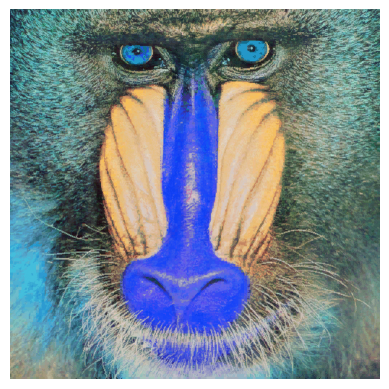

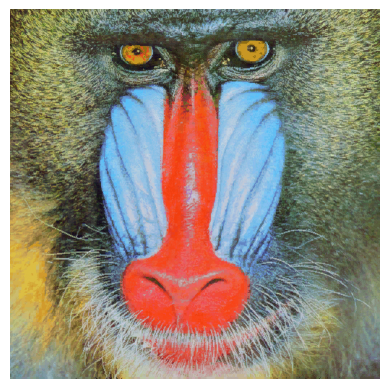

In [2]:
#Lee imagen de archivo
img = cv2.imread('mandril.jpg') 

#Si hay lectura correcta
if img is not None:
    #Muestra dimensiones
    print(img.shape)
    #Mostramos la imagen original con matplotlib
    plt.figure()
    #Eliminamos etiquetas de los ejes
    plt.axis("off")
    plt.imshow(img) 
    plt.show()

    #Recordar que OpenCV lee las imágenes almacenando en formato BGR, por lo que convertimos para visualizr de forma correcta a RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #Muestra la imagen tras convertir a RGB
    #Eliminamos etiquetas de los ejes
    plt.figure()
    plt.axis("off")
    plt.imshow(img_rgb) 
    plt.show()
else: 
    print('Imagen no encontrada')

Convierte a grises para procesar

(512, 512)


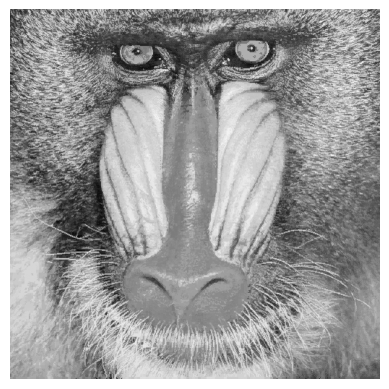

In [3]:
#Conversión de la imagen a niveles de grises de la imagen original en BGR
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gris.shape)
#Muestra, indicando el mapa de color de grises con matplotlib
plt.figure()
#Eliminamos etiquetas de los ejes
plt.axis("off")
plt.imshow(gris, cmap='gray') 
plt.show()


Canny, detector de contornos multietapa. Tratado en las sesiones de teoría (tema 4)

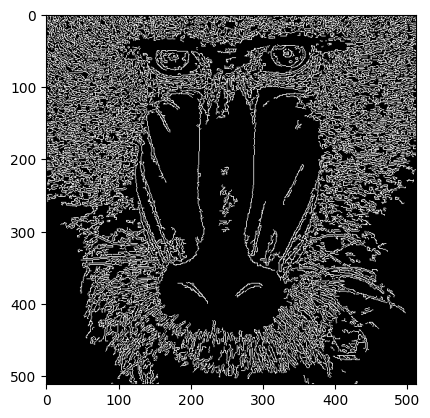

In [11]:
#Obtiene contornos con el operador de Canny
canny = cv2.Canny(gris, 250, 100)
#print(canny) #Muestra contenido, valores 0 o 255
#Visualiza resultado
plt.imshow(canny, cmap='gray') 
plt.show()


Contar el número de píxeles no nulos por columna y visualizar

[[  0 255   0 ...   0   0   0]
 [  0 255   0 ... 255   0   0]
 [255   0   0 ...   0 255 255]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


(0.0, 512.0)

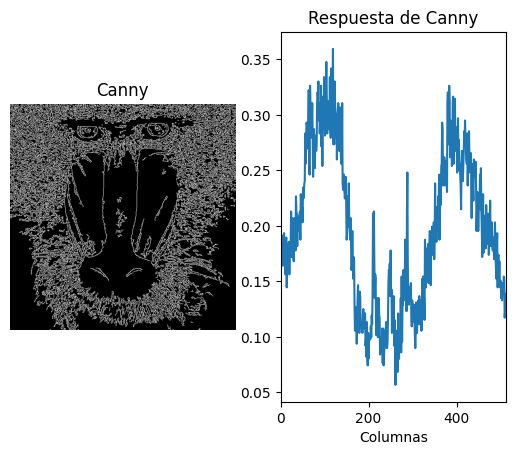

In [12]:
#El contenido de la imagen resultado de Canny, son valores 0 o 255, lo compruebas al descomentar
print(canny)

#Cuenta el número de píxeles blancos (255) por columna
#Suma los valores de los pixeles por columna
col_counts = cv2.reduce(canny, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

# - reduce: used to perform a reduction operation on the input image.
# - 0: axis along which the reduction operation is performed. 0 means the operation is performed along the rows.
# - cv2.REDUCE_SUM: specifies the type of reduction operation to be performed. cv2.REDUCE_SUM means the sum of the elements in each column is calculated.
# - dtype: specifies the data type of the output array. cv2.CV_32SC1 means the output array will be of type 32-bit signed integer.

#Normaliza en base al número de filas y al valor máximo del píxel (255)
#El resultado será el número de píxeles blancos por columna
cols = col_counts[0] / (255 * canny.shape[1])

#Muestra dicha cuenta gráficamente
plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray') 

plt.subplot(1, 2, 2)
plt.title("Respuesta de Canny")
plt.xlabel("Columnas")
plt.ylabel("% píxeles")
plt.plot(cols)
#Rango en x definido por las columnas
plt.xlim([0, canny.shape[0]])

## TAREA 1

### 1.1 Realiza la cuenta de píxeles blancos por filas (en lugar de por columnas). 

(1, 512)
(1, 512)


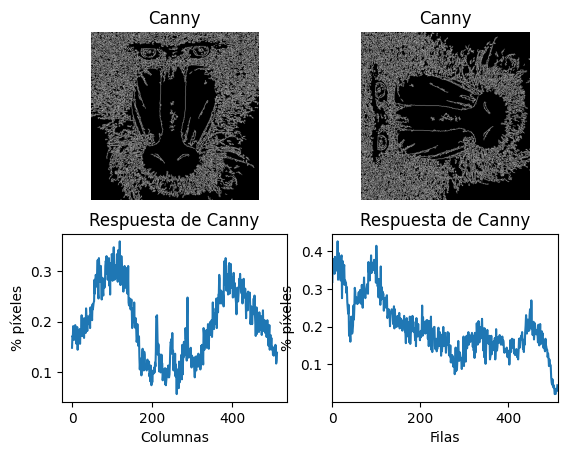

In [52]:
col_counts = cv2.reduce(canny, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
row_counts = np.transpose(cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)) 

# Note: 
# - Transpose: changes the dimensions of the array, so the shape of the array is swapped
# - Transpose is used to get the row counts from the column counts

# Normalize by the number of rows and the maximum pixel value (255)
cols = col_counts[0] / (255 * canny.shape[0]) # % of white pixels per column
rows = row_counts[0] / (255 * canny.shape[1]) # % of white pixels per row

print(col_counts.shape)  # Should output (1, 512)
print(row_counts.shape)  # Should output (512, 1)

#Muestra dicha cuenta gráficamente
plt.figure()

plt.subplot(2, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray') 

plt.subplot(2, 2, 2)
plt.axis("off")
plt.title("Canny")
plt.imshow(np.rot90(canny), cmap='gray') 

plt.subplot(2, 2, 3)
plt.title("Respuesta de Canny")
plt.xlabel("Columnas")
plt.ylabel("% píxeles")
plt.plot(cols)

plt.subplot(2, 2, 4)
plt.title("Respuesta de Canny")
plt.xlabel("Filas")
plt.ylabel("% píxeles")
plt.plot(rows)

#Rango en x definido por las filas
plt.xlim([0, canny.shape[1]])
# plt.ylim([0, canny.shape[0]])

plt.show()

### 1.2. Determina el máximo para filas y columnas (uno para cada) y muestra el número de filas con un número de píxeles blancos mayor o igual que 0.95*máximo.

In [58]:
max_x_value = np.max(cols)
max_y_value = np.max(rows)

# Calculate the 95% threshold for both maximum values
threshold_x = 0.95 * max_x_value
threshold_y = 0.95 * max_y_value

# Find the rows and columns that exceed the 95% threshold
rows_above_threshold = rows >= threshold_y
cols_above_threshold = cols >= threshold_x

print(max_x_value)
print(max_y_value)

# Rows with a number of white pixels greater than or equal to 0.95*maximum
rows_above_threshold = rows >= 0.95 * max_y_value
# print(rows_above_threshold)
print(np.sum(rows_above_threshold))

# Columns with a number of white pixels greater than or equal to 0.95*maximum
cols_above_threshold = cols >= 0.95 * max_x_value
# print(cols_above_threshold)
print(np.sum(cols_above_threshold))

0.359375
0.42578125
2
3


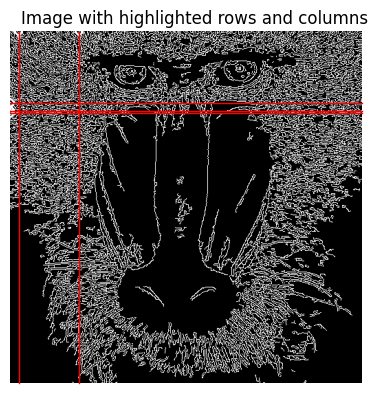

In [60]:
# Plot the image with the highlighted rows and columns
plt.figure()
plt.axis("off")
plt.title("Image with highlighted rows and columns")
plt.imshow(canny, cmap='gray')

for i in range(len(rows)):
    if rows[i] >= threshold_y:
        plt.plot([i, i], [0, canny.shape[1]], 'r', linewidth=1)

for i in range(len(cols)):
    if cols[i] >= threshold_x:
        plt.plot([0, canny.shape[0]], [i, i], 'r', linewidth=1)

# Sobel

Cuando hay un borde, el valor de intensidad de los píxeles cercanos cambia de forma notable, **calcular las derivadas proporciona una evidencia de dicho cambio**. El **operador de Sobel aproxima el cálculo de la derivada aplicando un kernel de tamaño impar basado en el patrón [1 2 1]**.

Nota: 
- Aplicamos una Gaussiana para suavizar la imagen original, eliminando altas frecuencias
- Calculamos las derivadas en ambas direcciones (horizontal y vertical)

The Sobel operator is another important tool in image processing, particularly for edge detection. Here's what you need to know about the Sobel operator:

* **Purpose:**
  * The Sobel operator is used to calculate the gradient of an image intensity function for edge detection. It emphasizes regions of high spatial frequency that correspond to edges.

* **How it works:**

  * The Sobel operator consists of two 3x3 kernels, one for detecting horizontal edges and another for vertical edges.
  * These kernels are convolved with the original image to calculate approximations of the derivatives in both horizontal and vertical directions.

* **Kernels:** The typical Sobel kernels are:
    * Horizontal (Gx):

    ```
      [-1, 0, 1],
      [-2, 0, 2],
      [-1, 0, 1]
    ```
    * Vertical (Gy):
    ```
      [-1, -2, -1],
      [0, 0, 0],
      [1, 2, 1]
    ```

**Implementation in OpenCV:**

OpenCV provides the `cv2.Sobel()` function to apply the Sobel operator. Here's a basic example:

```python
import cv2
import numpy as np

# Read the image in grayscale
img = cv2.imread('image.jpg', 0)

# Apply Sobel in x and y directions
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

# Calculate the gradient magnitude
magnitude = np.sqrt(sobelx**2 + sobely**2)

# Normalize for display
magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

# Display the result
cv2.imshow('Sobel Edge Detection', magnitude)
cv2.waitKey(0)
cv2.destroyAllWindows()
```

**Parameters of `cv2.Sobel()`:**

- `src`: Input image
- `ddepth`: Output image depth (e.g., cv2.CV_64F for 64-bit float)
- `dx`: Order of derivative in x direction (0, 1, or 2)
- `dy`: Order of derivative in y direction (0, 1, or 2)
- `ksize`: Size of the Sobel kernel (1, 3, 5, or 7)

**Advantages:**

- Simple and fast computation
- Detects edges and their orientation

**Limitations:**

- Sensitive to noise
- May produce thicker edges compared to more advanced methods


**Comparison with Canny:**

- Sobel is often used as a step within more complex edge detection algorithms, including Canny.
- Canny generally produces better results as it includes additional steps like non-maximum suppression and hysteresis thresholding.


**Applications:**

- Edge detection in image processing
- Feature extraction for computer vision tasks
- Part of more complex algorithms for image analysis

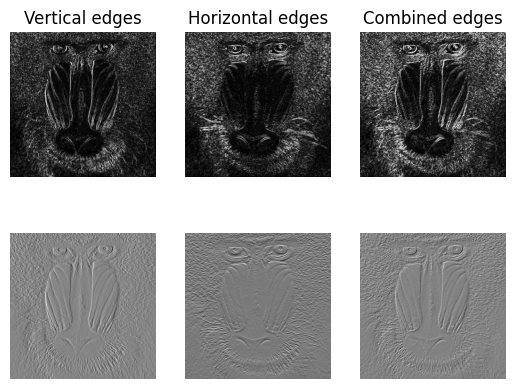

In [64]:
img = cv2.imread('mandril.jpg') 
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


# Gaussian blur to smooth the image, removing high frequencies
img_blur = cv2.GaussianBlur(img_gray, (3, 3), 0)

# Calculate the derivatives in both directions (horizontal and vertical)
sobelx = cv2.Sobel(img_blur, cv2.CV_64F, 1, 0)  # x
sobely = cv2.Sobel(img_blur, cv2.CV_64F, 0, 1)  # y

# Combine both results
sobel = cv2.add(sobelx, sobely)

# Show both results
plt.figure()

# Vertical edges
plt.subplot(2, 3, 1)
plt.axis("off")
plt.title('Vertical edges')
plt.imshow(cv2.convertScaleAbs(sobelx), cmap='gray') # Convert to a grayscale image for visualization

plt.subplot(2, 3, 4)
plt.axis("off")
plt.imshow(sobelx, cmap='gray') # Test without converting scale

# Horizontal edges
plt.subplot(2, 3, 2)
plt.axis("off")
plt.title('Horizontal edges')
plt.imshow(cv2.convertScaleAbs(sobely), cmap='gray') # Convert to a grayscale image for visualization

plt.subplot(2, 3, 5)
plt.axis("off")
plt.imshow(sobely, cmap='gray') # Test without converting scale

# Combined edges
plt.subplot(2, 3, 3)
plt.axis("off")
plt.title('Combined edges')
plt.imshow(cv2.convertScaleAbs(sobel), cmap='gray') # Convert to a grayscale image for visualization

plt.subplot(2, 3, 6)
plt.axis("off")
plt.imshow(sobel, cmap='gray') # Test without converting scale

plt.show()

## Umbralizado de una imagen

### Image Thresholding Basics

#### Core Concept
- Separate image pixels into two classes based on intensity

#### Simple Algorithm
1. Choose threshold T
2. For each pixel:
   - If value > T, set to 255 (white)
   - If value ≤ T, set to 0 (black)

#### OpenCV Usage
```python
ret, thresh = cv2.threshold(img, T, 255, cv2.THRESH_BINARY)
```

#### Key Points
- Fast and simple segmentation method
- Effective for high-contrast images
- Sensitive to noise and lighting changes
- Experiment with threshold values for best results

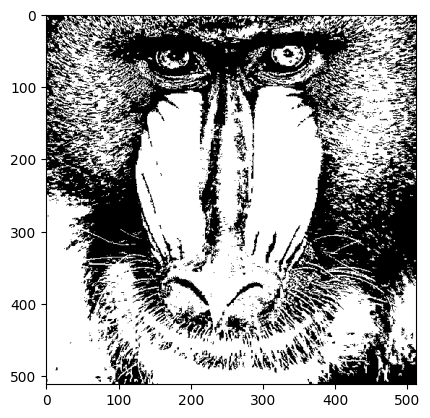

In [71]:
# Define threshold value
threshold = 120 # Try other values

# Get thresholded image for the defined value
res, thresholded_image = cv2.threshold(gris, threshold, 255, cv2.THRESH_BINARY)

# Show result
plt.imshow(thresholded_image, cmap='gray') # Visualize with grayscale color map
plt.show()

### Histograma de una imagen

El histograma de una imagen aporta información sobre el valor de umbral a elegir para ciertas situaciones

**Key concepts:**

- Image histogram: A graphical representation of the pixel intensity distribution in an image.
- Bins: Categories into which pixel values are grouped (here, 256 bins for 256 possible grayscale values).
- Normalization: Converting raw counts to percentages for easier comparison between images of different sizes.

**How this helps with thresholding:**

- The histogram shows the distribution of pixel intensities.
- Peaks in the histogram represent common intensity values.
- Valleys between peaks can often be good choices for threshold values, as they separate different intensity regions in the image.
- For example, in an image with a dark background and light objects, you might see two peaks. The valley between them could be a good threshold to separate the objects from the background.

By visualizing this data, you can make more informed decisions about choosing threshold values for image segmentation tasks.


(0.0, 256.0)

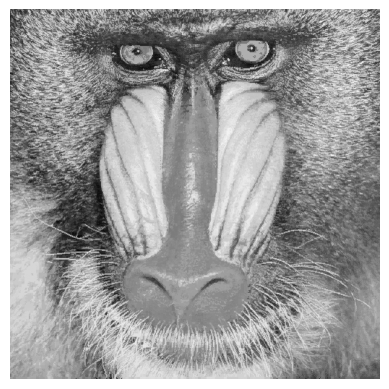

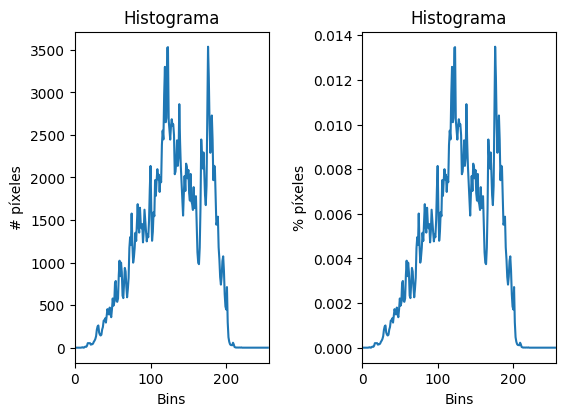

In [73]:
img = cv2.imread('mandril.jpg') 
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Calculate the histogram of the grayscale image
hist = cv2.calcHist([img_gray], [0], None, [256], [0, 256])

plt.figure()
plt.axis("off")
plt.imshow(gris, cmap='gray')

# Show the histogram
plt.figure()
plt.subplot(1, 2, 1)
plt.title("Histograma")
plt.xlabel("Bins")
plt.ylabel("# píxeles")
plt.plot(hist)
plt.xlim([0, 256])

#Normaliza el histograma en base al número de píxeles y lo muestra
hist /= hist.sum()

plt.subplot(1, 2, 2)
plt.title("Histograma")
plt.xlabel("Bins")
plt.ylabel("% píxeles")
plt.tight_layout(pad=3.0) #separación entre plots
plt.plot(hist)
plt.xlim([0, 256])

TAREA: Aplica umbralizado a la imagen resultante de Sobel (valores 0 a 255 y convertida a 8 bits por ejemplo sobel8 = np.uint8(sobel)), y posteriormente realiza el conteo por filas y columnas similar al realizado en el ejemplo con la salida de Canny. Calcula los máximos por filas y columnas, y determina las filas y columnas por encima del 0.95*máximo. Remarca con alguna primitiva gráfica dichas filas y columnas sobre la imagen ¿Cómo se comparan los resultados obtenidos a partir de Sobel y Canny?

Diferencia de imágenes

In [ ]:
#Calcula la diferencia entre dos imágenes
#Utiliza la imagen original y la obtenida tras aplicar la gaussiana (creada en la celda dedicada a Sobel)
dif = cv2.absdiff(gris, ggris)

#Visualiza
plt.figure()
plt.subplot(1, 2, 1)
plt.title("Diferencias")
plt.axis("off")
plt.imshow(dif, cmap='gray') 

#Zonas de mayor diferencia tras aplicar umbral
res, imgdif = cv2.threshold(dif, 30, 255, cv2.THRESH_BINARY)
#Visualiza
plt.subplot(1, 2, 2)
plt.title("Mayores")
plt.axis("off")
plt.imshow(imgdif, cmap='gray') 
plt.show()


Webcam y sustracción de fotogramas

In [ ]:
vid = cv2.VideoCapture(0)

#Marca de inicio
disponible = 0 
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        if disponible > 0:
            dif = cv2.absdiff(frame, pframe)        
            # Muestra resultado
            cv2.imshow('Diferencia', dif)        

        else:
            disponible = 1

        #Copia fotograma actual para la diferencia en el siguiente forograma
        pframe = frame.copy()
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

Webcam y sustracción de modelo del fondo

In [ ]:
vid = cv2.VideoCapture(0)

# Fondo
# Inicializa la sustracción del fondo con mezcla de gaussianas y detección de sombras
eliminadorFondo = cv2.createBackgroundSubtractorMOG2(history=100, varThreshold=50, detectShadows=True)
  
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        # Aplica efecto espejo sobre la entrada
        framem=cv2.flip(frame, 1)

        
        #Con un segundo parámerto se puede definir máscara con zonas a actualizar
        objetos = eliminadorFondo.apply(framem)
        #objetos = eliminadorFondo.apply(framem, objetos, 0)  #No actualiza el fondo
        # Obtiene fondo
        background = eliminadorFondo.getBackgroundImage()

        # Muestra resultado
        cv2.imshow('Fotograma', objetos)
        # Muestra fondo
        cv2.imshow('Fondo', background)
  
   
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()


TAREA: Proponer un demostrador que capture las imágenes de la cámara, y les permita exhibir lo aprendido en estas dos prácticas ante quienes no cursen la asignatura :). Es por ello que además de poder mostrar la imagen original de la webcam, incluya al menos dos usos diferentes de aplicar las funciones de OpenCV trabajadas hasta ahora.


TAREA: Tras ver los vídeos [My little piece of privacy](https://www.niklasroy.com/project/88/my-little-piece-of-privacy), [Messa di voce](https://youtu.be/GfoqiyB1ndE?feature=shared) y [Virtual air guitar](https://youtu.be/FIAmyoEpV5c?feature=shared) plantear una reinterpretación de la parte de procesamiento de la imagen tomando como punto de partida alguna de dichas instalaciones.